In [1]:
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Car_Insurance_Claim.csv')

In [3]:
df['OUTCOME'] = df['OUTCOME'].astype(int)

In [4]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int32
dtype: object

In [5]:
df.drop(['ID', 'RACE','EDUCATION','INCOME','VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE','ANNUAL_MILEAGE','VEHICLE_YEAR','SPEEDING_VIOLATIONS','DUIS'],axis=1, inplace=True)

In [6]:
df.dtypes

AGE                    object
GENDER                 object
DRIVING_EXPERIENCE     object
CREDIT_SCORE          float64
VEHICLE_TYPE           object
PAST_ACCIDENTS          int64
OUTCOME                 int32
dtype: object

In [7]:
df['AGE'] = df['AGE'].map({'65+':4, '16-25':1, '26-39':2, '40-64':3})
df['GENDER'] = df['GENDER'].map({'female':2,'male':1})
df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].map({'0-9y':1, '10-19y':2, '20-29y':3, '30y+':4})
df['VEHICLE_TYPE'] = df['VEHICLE_TYPE'].map({'sedan':1,'sports car':2})

In [8]:
df.describe()

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_TYPE,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000
mean,2.489500,1.501000,2.069300,0.515813,1.047700,1.056300,0.313300
std,1.025278,0.500024,0.990452,0.137688,0.213141,1.652454,0.463858
min,1.000000,1.000000,1.000000,0.053358,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.417191,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,0.525033,1.000000,0.000000,0.000000
75%,3.000000,2.000000,3.000000,0.618312,1.000000,2.000000,1.000000
max,4.000000,2.000000,4.000000,0.960819,2.000000,15.000000,1.000000


In [9]:
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean())

In [10]:
df.describe()

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_TYPE,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.489500,1.501000,2.069300,0.515813,1.047700,1.056300,0.313300
std,1.025278,0.500024,0.990452,0.130752,0.213141,1.652454,0.463858
min,1.000000,1.000000,1.000000,0.053358,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.431509,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,0.515813,1.000000,0.000000,0.000000
75%,3.000000,2.000000,3.000000,0.607607,1.000000,2.000000,1.000000
max,4.000000,2.000000,4.000000,0.960819,2.000000,15.000000,1.000000


In [11]:
df.dtypes

AGE                     int64
GENDER                  int64
DRIVING_EXPERIENCE      int64
CREDIT_SCORE          float64
VEHICLE_TYPE            int64
PAST_ACCIDENTS          int64
OUTCOME                 int32
dtype: object

In [12]:
corr = round(df.corr(),4)
corr.style.background_gradient()

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_TYPE,PAST_ACCIDENTS,OUTCOME
AGE,1.000000,-0.005900,0.707400,0.471400,-0.008500,0.431100,-0.448500
GENDER,-0.005900,1.000000,-0.007500,0.077500,0.000000,-0.223200,-0.107200
DRIVING_EXPERIENCE,0.707400,-0.007500,1.000000,0.327700,-0.008600,0.604700,-0.497400
CREDIT_SCORE,0.471400,0.077500,0.327700,1.000000,-0.013100,0.172100,-0.309000
VEHICLE_TYPE,-0.008500,0.000000,-0.008600,-0.013100,1.000000,-0.013300,0.005600
PAST_ACCIDENTS,0.431100,-0.223200,0.604700,0.172100,-0.013300,1.000000,-0.311500
OUTCOME,-0.448500,-0.107200,-0.497400,-0.309000,0.005600,-0.311500,1.000000


In [13]:
df.columns

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'CREDIT_SCORE', 'VEHICLE_TYPE',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [14]:
data_x = df.drop(['OUTCOME'], axis=1)
data_y = df['OUTCOME']

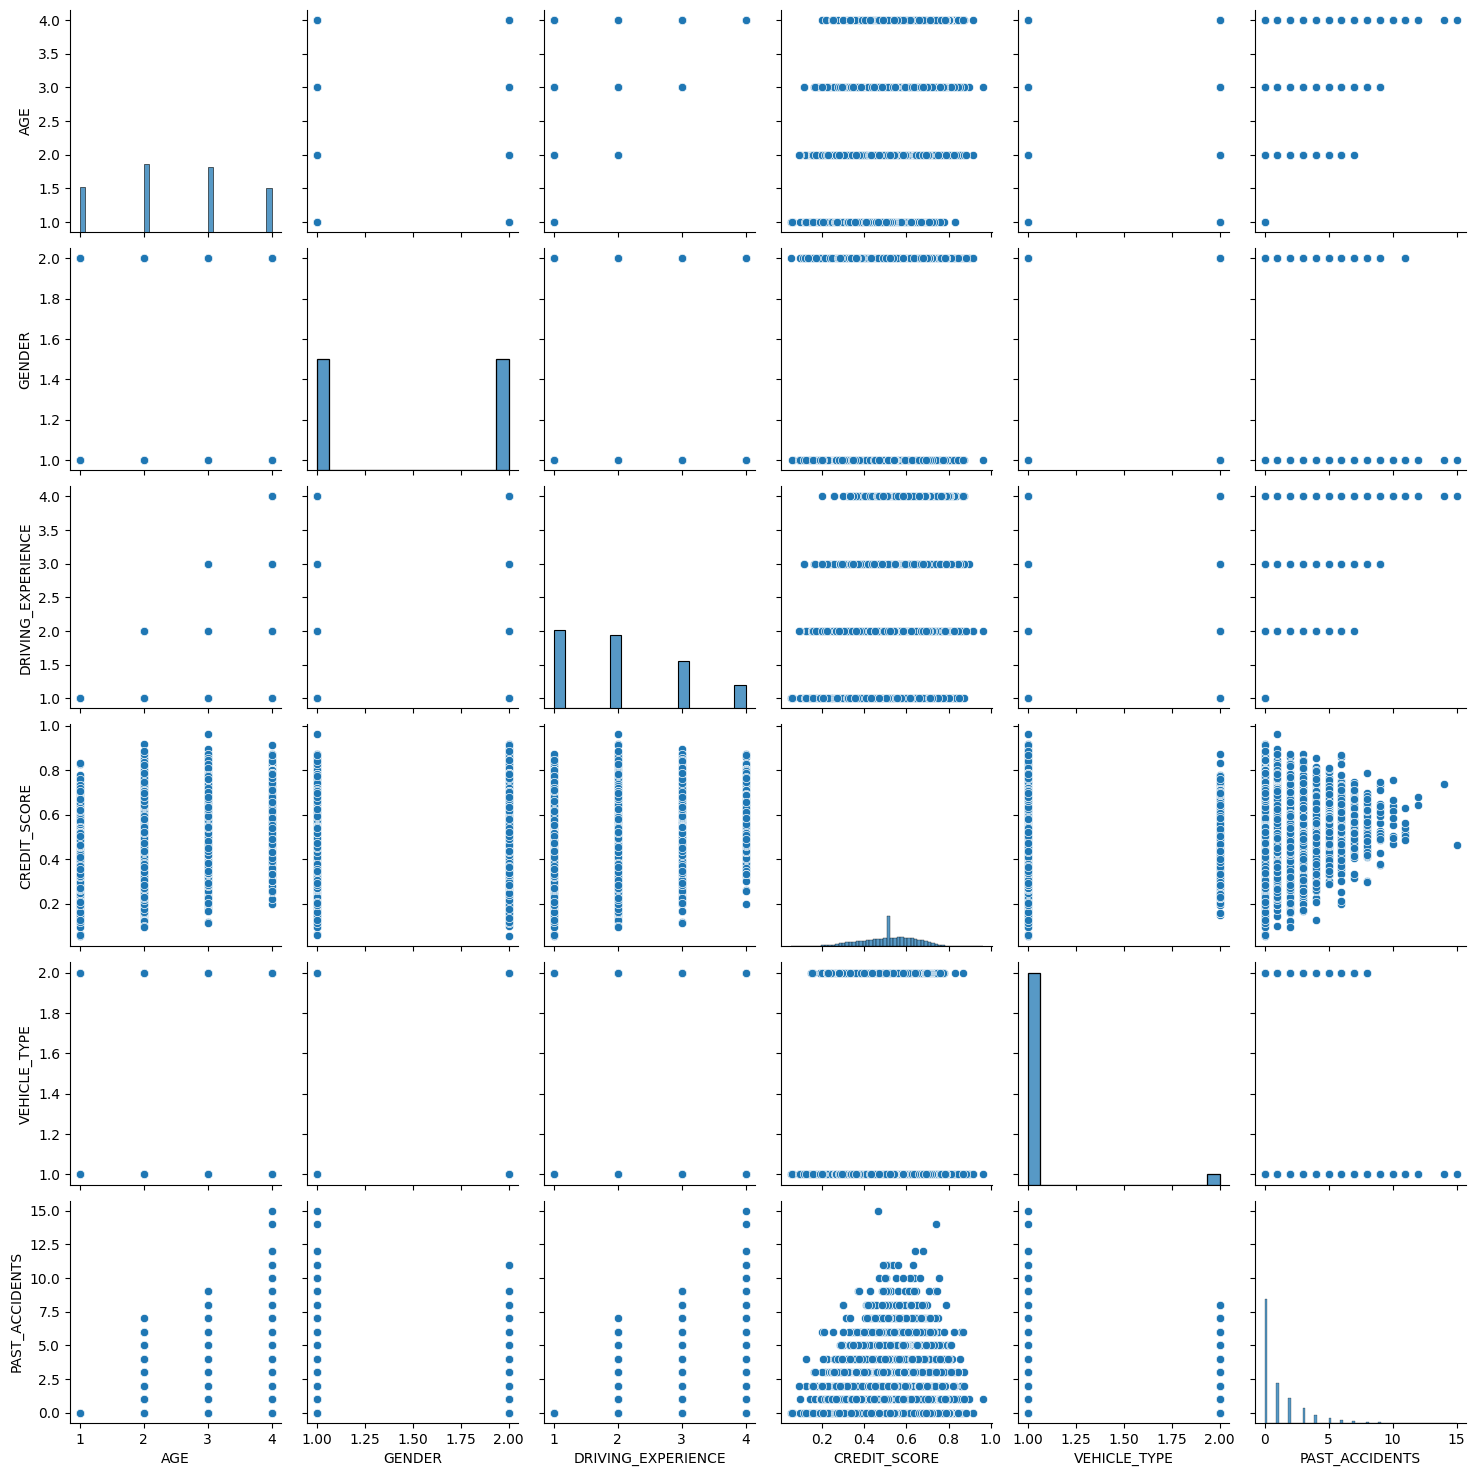

In [15]:
sns.pairplot(data_x)

In [16]:
forest = RandomForestClassifier()

In [17]:
forest.fit(data_x, data_y)

RandomForestClassifier()

In [18]:
print(f'El score del modelo es: {round(forest.score(data_x, data_y), 4) *100}%')

El score del modelo es: 98.18%


In [19]:
data_x

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_TYPE,PAST_ACCIDENTS
0,4,2,1,0.629027,1,0
1,1,1,1,0.357757,1,0
2,1,2,1,0.493146,1,0
3,1,1,1,0.206013,1,0
4,2,1,2,0.388366,1,1
...,...,...,...,...,...,...
9995,2,2,2,0.582787,1,1
9996,2,2,2,0.522231,1,0
9997,2,1,1,0.470940,1,0
9998,2,2,2,0.364185,1,1


In [20]:
ages = ['16-25', '26-39', '40-64', '65+']
sex = ['masculino','femenino']
year_experience = ['0-9','10-19','20-29','30+']
vehicule = ['sedan', 'sports car']
state = ['si reclamo', 'no reclamo']


def auto_insurance_claims(model, age, gender, driving_experience, credit_score, vehicule_type, past_accident):
    predicted = model.predict([[age, gender, driving_experience, credit_score, vehicule_type, past_accident]])
    print(f'La persona con edad entre {ages[age]} de sexo {sex[gender]} de {year_experience[driving_experience]} años de experiencia conduciendo un {vehicule[vehicule_type]} que tiene un puntaje de credito de {credit_score} y accidentes pasadas de {past_accident}, {state[predicted[0]]} el seguro de su vehiculo.')

In [21]:
auto_insurance_claims(forest, 0, 0, 0, 0.629027313918201, 1, 3)

La persona con edad entre 16-25 de sexo masculino de 0-9 años de experiencia conduciendo un sports car que tiene un puntaje de credito de 0.629027313918201 y accidentes pasadas de 3, si reclamo el seguro de su vehiculo.


c:\Users\Alexis\Desktop\apuntes en clase de algoritmica\apuntesAlgoritmica\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
